## Created nate_branch for phase 2 group project

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Possible stakeholder:
Here's how much your home will sell for. Ask Shane about standard average  asking price -  haggle price = closing price so we can adjust our recommendation up that percent 
say asking_price = 100,000 and buyer haggles to 90,000, we would factor that in and recommend asking_price be 110,000

object to datetime for this purpose. ['yr_renovated'] has 3842 Null values.

our price mean is 540296.5735055795

['price'] and ['zipcode'] have a very low correlation of -0.05340243437772487

Top correlations with price
sqft_living = 0.70
grade = 0.66
sqft_above = 0.60
sqft_living15 = 0.58


['yr_renovated'] has something in it that the second_model doesn't like

In [43]:
# Import the necessary libraries


import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import gamma
import scipy as sp
import numpy as np
from matplotlib.lines import Line2D
import itertools
from scipy import stats
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
from collections import Counter
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans, AgglomerativeClustering

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit, RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer, PolynomialFeatures 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV, RFE
#validation libraries
from IPython.display import display
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [42]:
# read the data into a variable called data
data = pd.read_csv('data/kc_house_data.csv')

# make a copy of data to work with calle df
df = data.copy(deep=True)

# converted dates from object to datetime
df.date = pd.to_datetime(df.date,infer_datetime_format=True) # Monday trying Arthur's month formula
df['date']=df['date'].apply(lambda x: x.toordinal())

# Arthur's 
df['month_of_date'] = pd.DatetimeIndex(df['date']).month

# getting rid of a question mark in one of the columns
df['sqft_basement'] = df['sqft_basement'].replace({'?':np.nan}).astype(float)


# get rid of those pesky NaN
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# convert to log_price 
df['log_price'] = np.log(df['price']) #$$$$$$

# removing normalized price from our log_price df
df.drop(['price'], axis=1, inplace=True) #$$$$$

df['view'] = df['view'].fillna(0)

df.rename(columns={'floors_1.5': 'floors_1_5', 'floors_2.0': 'floors_2', 'floors_2.5': 'floors_2_5',
                   'floors_3.0': 'floors_3', 'floors_3.5': 'floors_3_5'}, inplace=True)

df = pd.get_dummies(df, prefix='floors', prefix_sep='_', columns=['floors'], drop_first = True)
df = pd.get_dummies(df, prefix='waterfront', prefix_sep='_', columns=['waterfront'], drop_first = True)
df = pd.get_dummies(df, prefix='view', prefix_sep='_', columns=['view'], drop_first = True)
df = pd.get_dummies(df, prefix='condition', prefix_sep='_', columns=['condition'], drop_first = True)
df = pd.get_dummies(df, prefix='grade', prefix_sep='_', columns=['grade'], drop_first = True)
df = pd.get_dummies(df, prefix='month', prefix_sep='_', columns=['month_of_date'], drop_first = True)
df = pd.get_dummies(df, prefix='zipcode', prefix_sep='_', columns=['zipcode'], drop_first = True)

# check log_price minimum
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,log_price,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,735519,3,1.00,1180,5650,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650,12.309982,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,735576,3,2.25,2570,7242,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639,13.195614,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,735654,2,1.00,770,10000,770,0.0,1933,0.0,47.7379,-122.233,2720,8062,12.100712,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,735576,4,3.00,1960,5000,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000,13.311329,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,735647,3,2.00,1680,8080,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503,13.142166,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df.waterfront = df.waterfront.fillna(0)

df_dummies = pd.get_dummies(df, prefix='waterfront', prefix_sep='_',
                           columns=['waterfront'], drop_first = True)
dummy_waterfront = df_dummies['waterfront_1.0']


df_dummies['dummy_waterfront'] = dummy_waterfront

df_dummies.drop('waterfront_1.0', axis=1, inplace=True)

df_dummies.head()
#df.head()


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,log_price,dummy_waterfront
0,7129300520,735519,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,12.309982,0
1,6414100192,735576,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,13.195614,0
2,5631500400,735654,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1,12.100712,0
3,2487200875,735576,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,13.311329,0
4,1954400510,735647,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,13.142166,0


## Adjusting Longitude and Latitude

In [4]:
# Now to deal with longitude and latitude
# Round off after the decimal to help our model 
# df = df.round({"long":4, "lat":4})

# **A second option to deal with long and lat**
# Change long and lat to radians instead of degrees
df["long"] = np.radians(df["long"])
df["lat"] = np.radians(df["lat"])

## KMeans color clustering the map

In [5]:
# k means
# https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['lat', 'long']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Assigning our model variables 

In [6]:
dropped_cols_for_work = [ 'id','sqft_lot', 'floors'
                ,'waterfront', 'yr_built','sqft_basement', 'date'
            ,'zipcode', 'yr_renovated', 'bathrooms', 'cen_x', 'cen_y']
#X_train.waterfront.value_counts()

In [7]:
y_reg = data.price
y = df.log_price  #changed log_price to log Sunday night 8:40
X = df.drop('log_price', axis=1) #changed log_price to log Sunday night 8:40

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) # ,random_state=10) if you want the samples to stay the same each time

# X_train.drop(['date'], axis=1, inplace=True)
# X_test.drop(['date'], axis=1, inplace=True)

# # changed ? in ['sqft_basement to NaN']
# X_train['sqft_basement'] = X_train['sqft_basement'].replace({'?':np.nan}).astype(float)
# X_test['sqft_basement'] = X_test['sqft_basement'].replace({'?':np.nan}).astype(float)
X_train.tail(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,cluster,cen_x,cen_y,c
3426,8604900017,735514,3,1.50,1640,2720,1.5,0.0,0.0,3,8,1640,0.0,1929,0.0,98115,0.832293,-2.134834,1490,4375,1,1,0.831591,-2.134709,#81DF20
14985,9268200585,735479,2,1.00,1220,5040,1.0,0.0,0.0,3,7,1220,0.0,1961,0.0,98117,0.832447,-2.135655,1420,5040,1,1,0.831591,-2.134709,#81DF20
20046,9301300805,735582,3,2.50,1300,1590,2.0,0.0,0.0,3,8,1100,200.0,2014,0.0,98109,0.831447,-2.135288,1070,1223,1,1,0.831591,-2.134709,#81DF20
18427,1870400615,735666,5,1.75,2240,4750,1.0,0.0,0.0,4,7,1120,1120.0,1920,0.0,98115,0.832046,-2.134416,1980,4750,1,1,0.831591,-2.134709,#81DF20
19610,3343301343,735557,5,3.50,4600,8764,2.0,0.0,0.0,3,10,3180,1420.0,2007,0.0,98006,0.829888,-2.132618,3210,9431,1,1,0.831591,-2.134709,#81DF20


## Plotting out the locations of our homes over a map of King Co.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


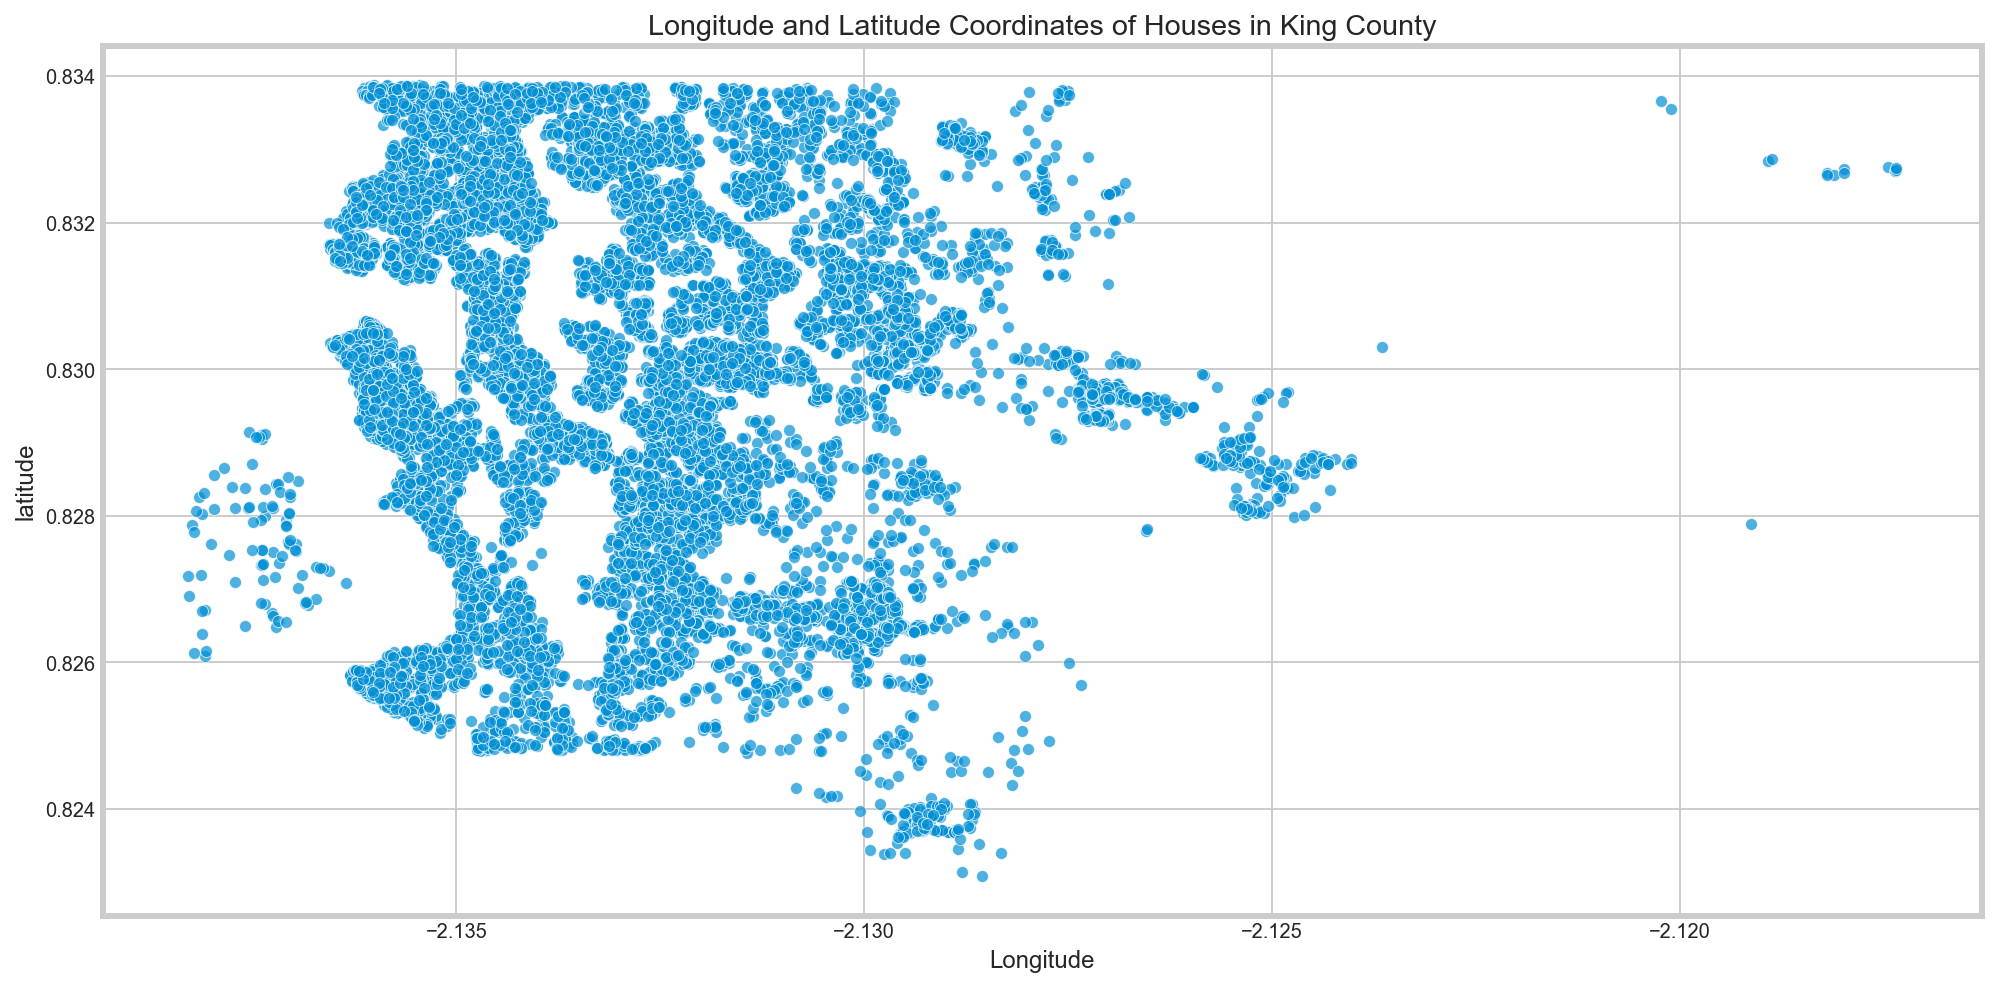

In [8]:
fig, ax = plt.subplots(figsize = (15,8))
sns.scatterplot(X_train.long, X_train.lat, alpha=.7);

plt.title('Longitude and Latitude Coordinates of Houses in King County')
plt.xlabel('Longitude')
plt.ylabel('latitude');

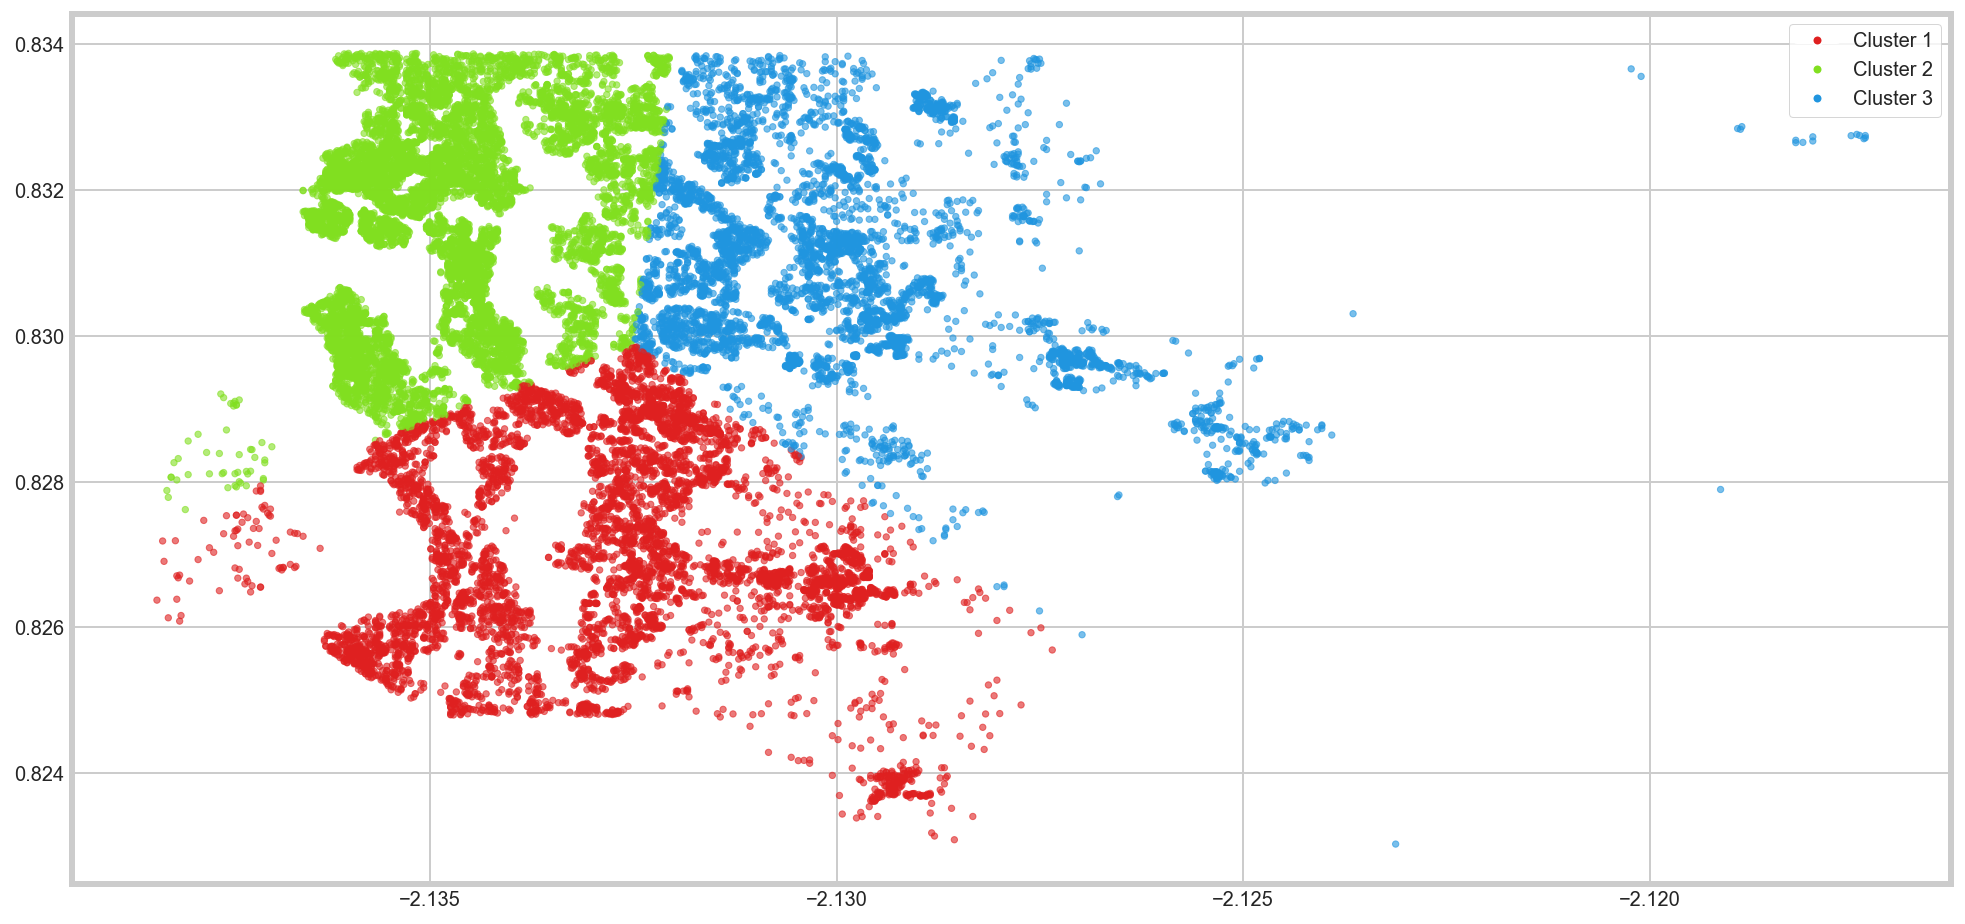

In [9]:
plt.figure(figsize=(15,8))

plt.scatter(df.long, df.lat, c=df.c, alpha = 0.6, s=10,)

# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper right');

## A heatmap to help inspect correlation

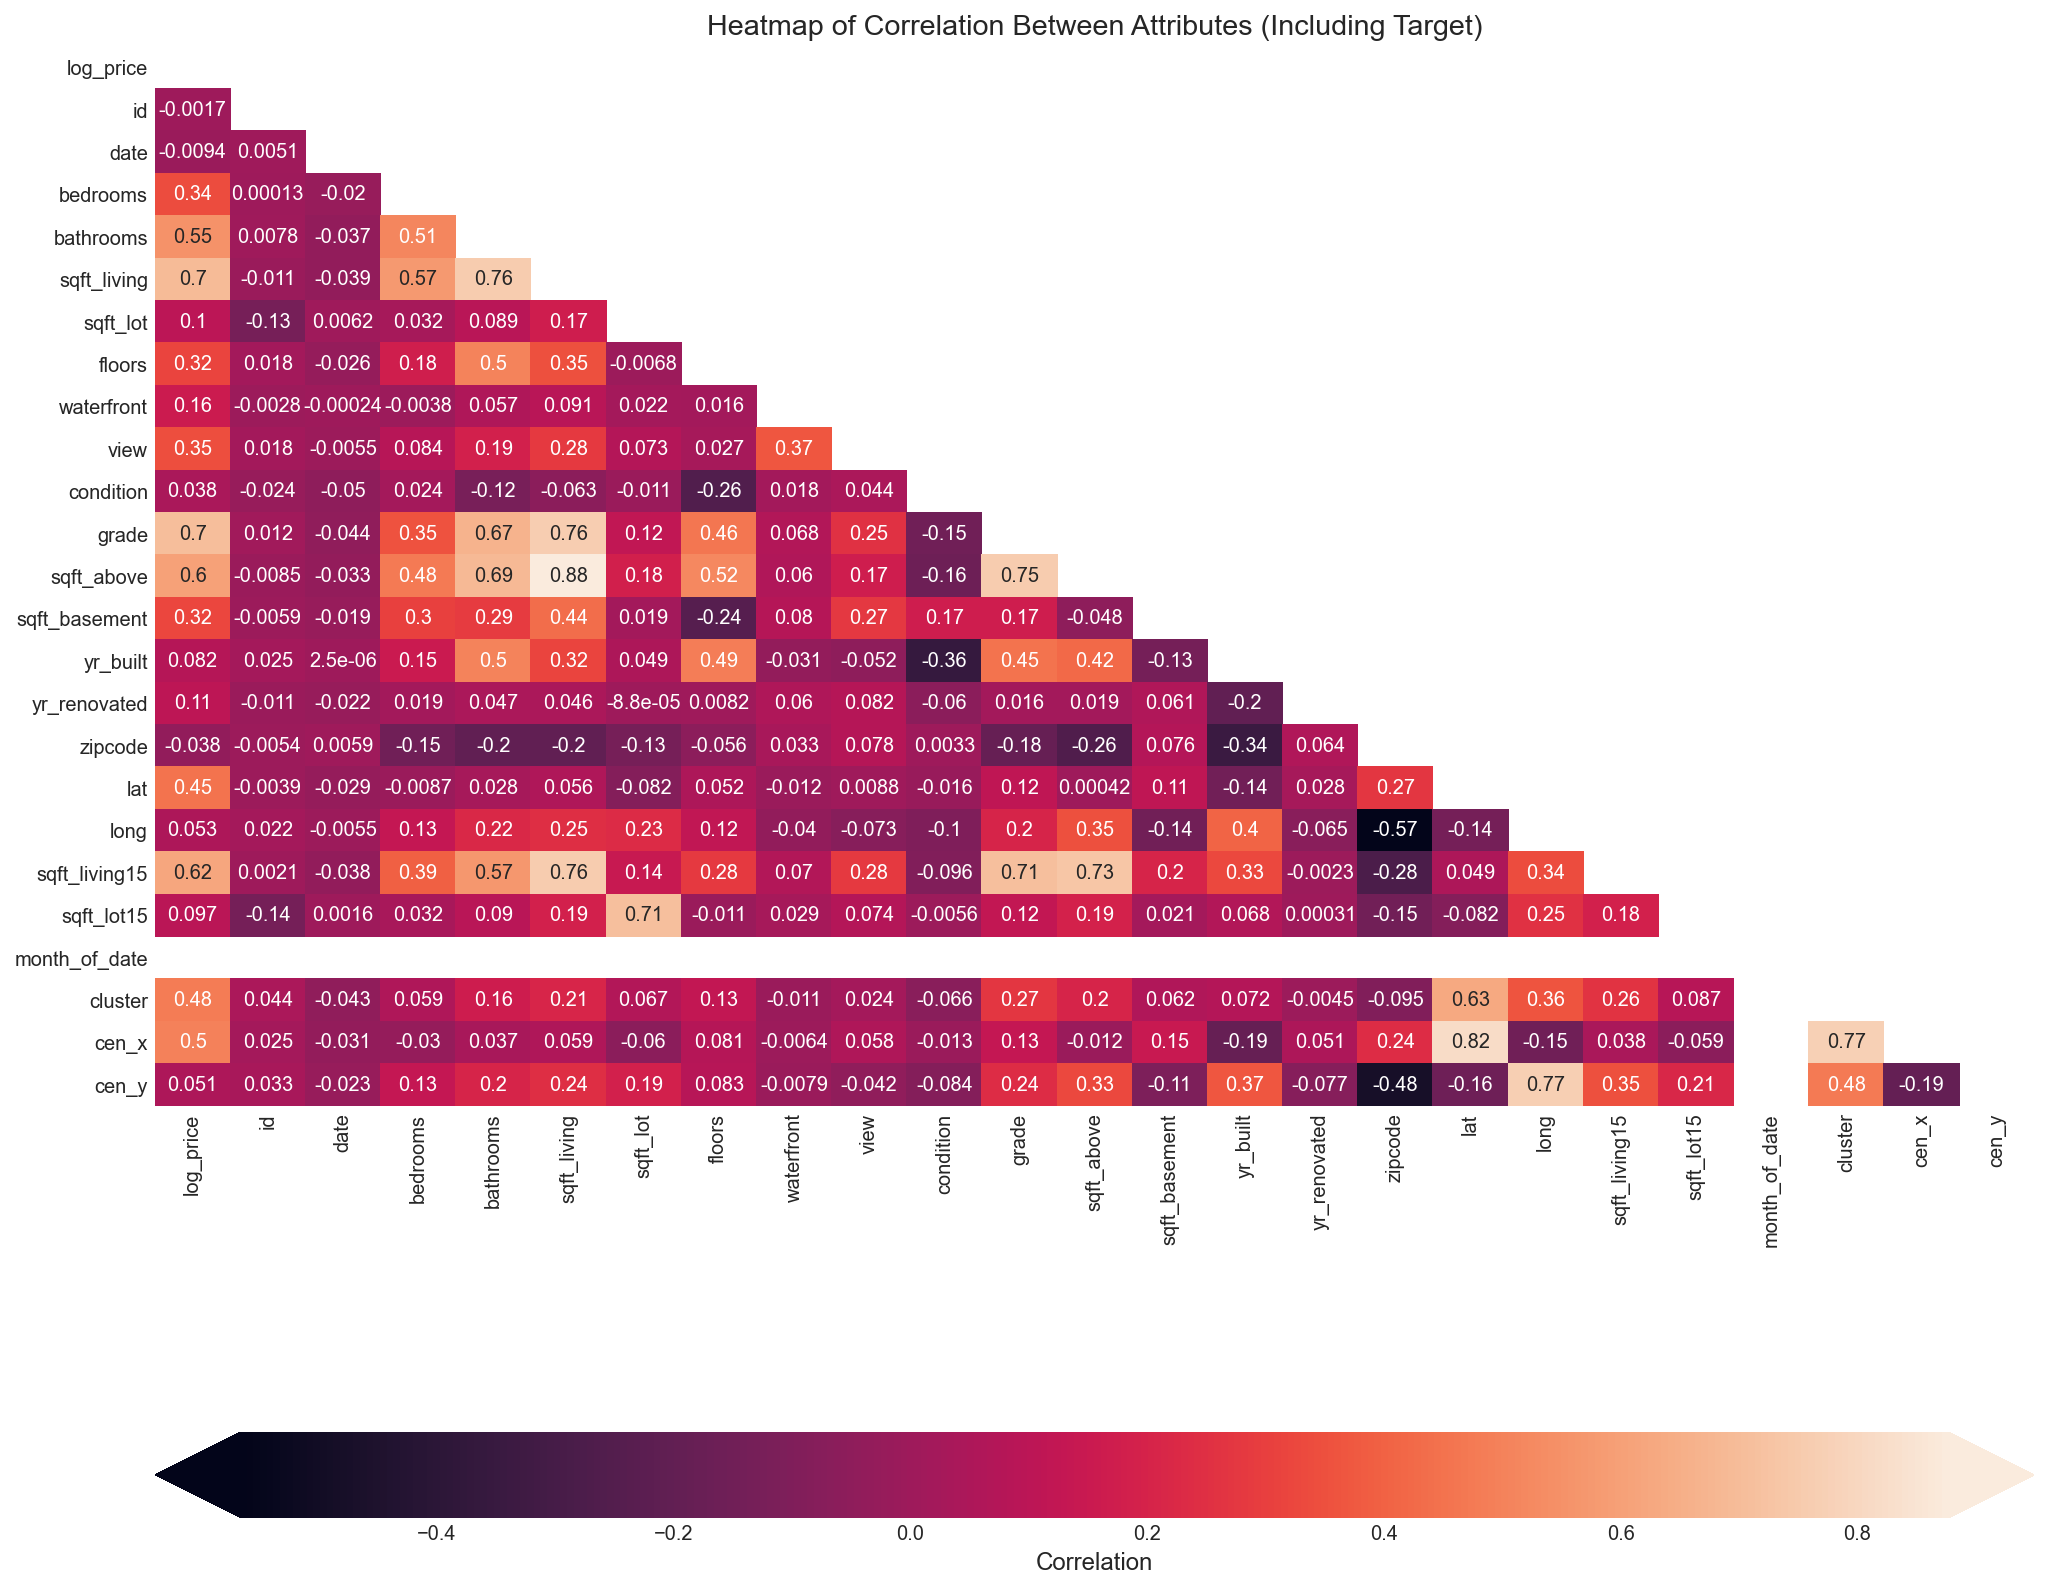

In [10]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

## Correlation amung the features

In [11]:
# bedrooms
# sqft_living
# condition
# grade
# lat
# sqft_living15
# view
# sqft_above

In [12]:
print(data.price.min())
print(data.price.max())

78000.0
7700000.0


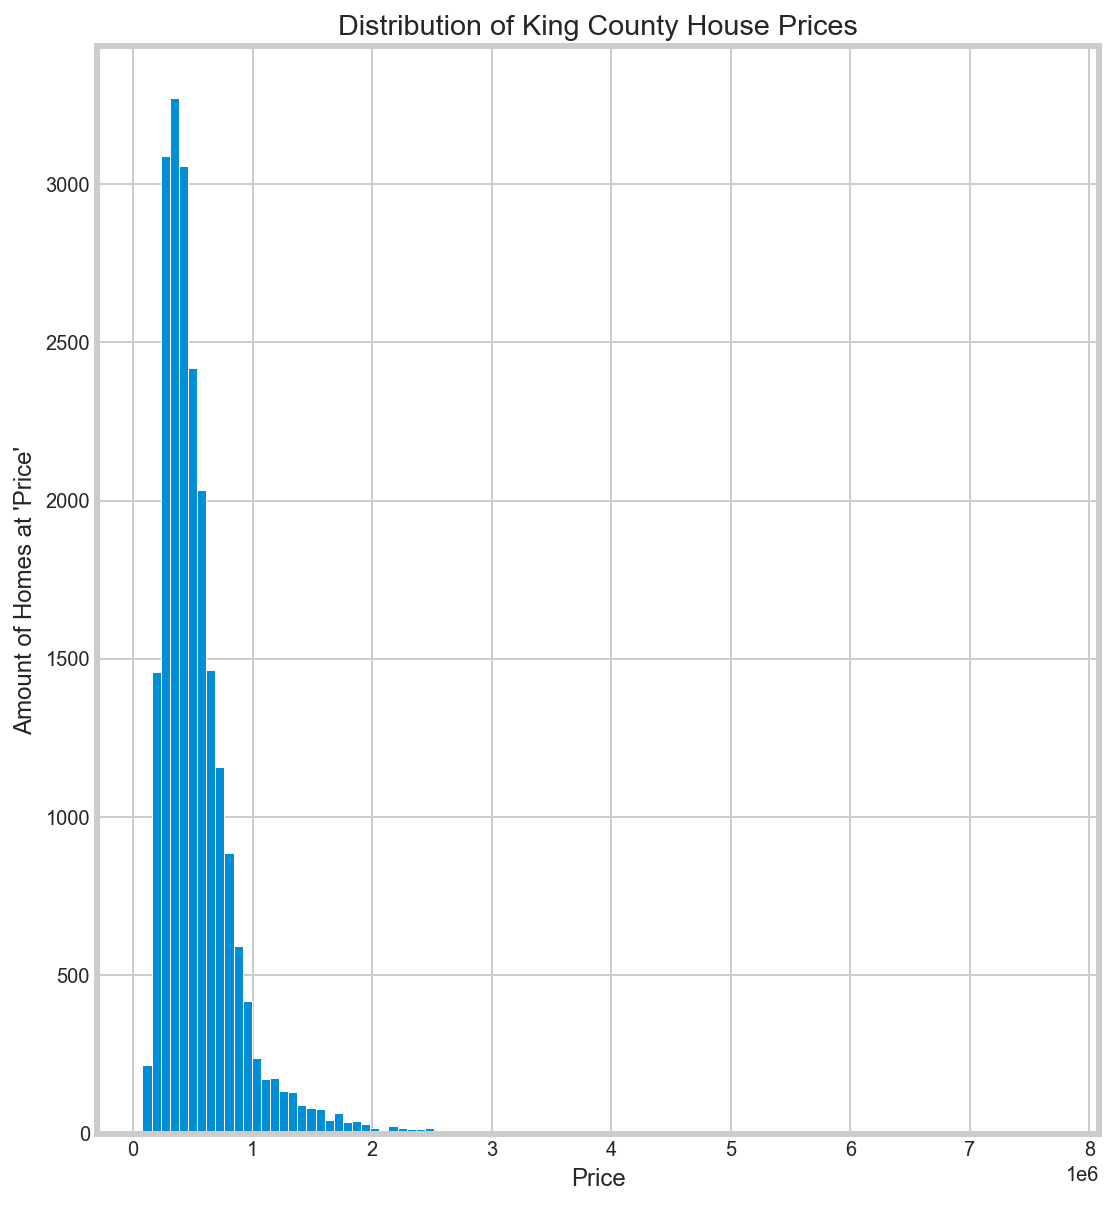

In [13]:
fig, ax = plt.subplots(figsize=(8, 10))

ax.hist(y_reg, bins=100)

ax.set_xlabel("Price")
ax.set_ylabel("Amount of Homes at 'Price'")
ax.set_title("Distribution of King County House Prices");

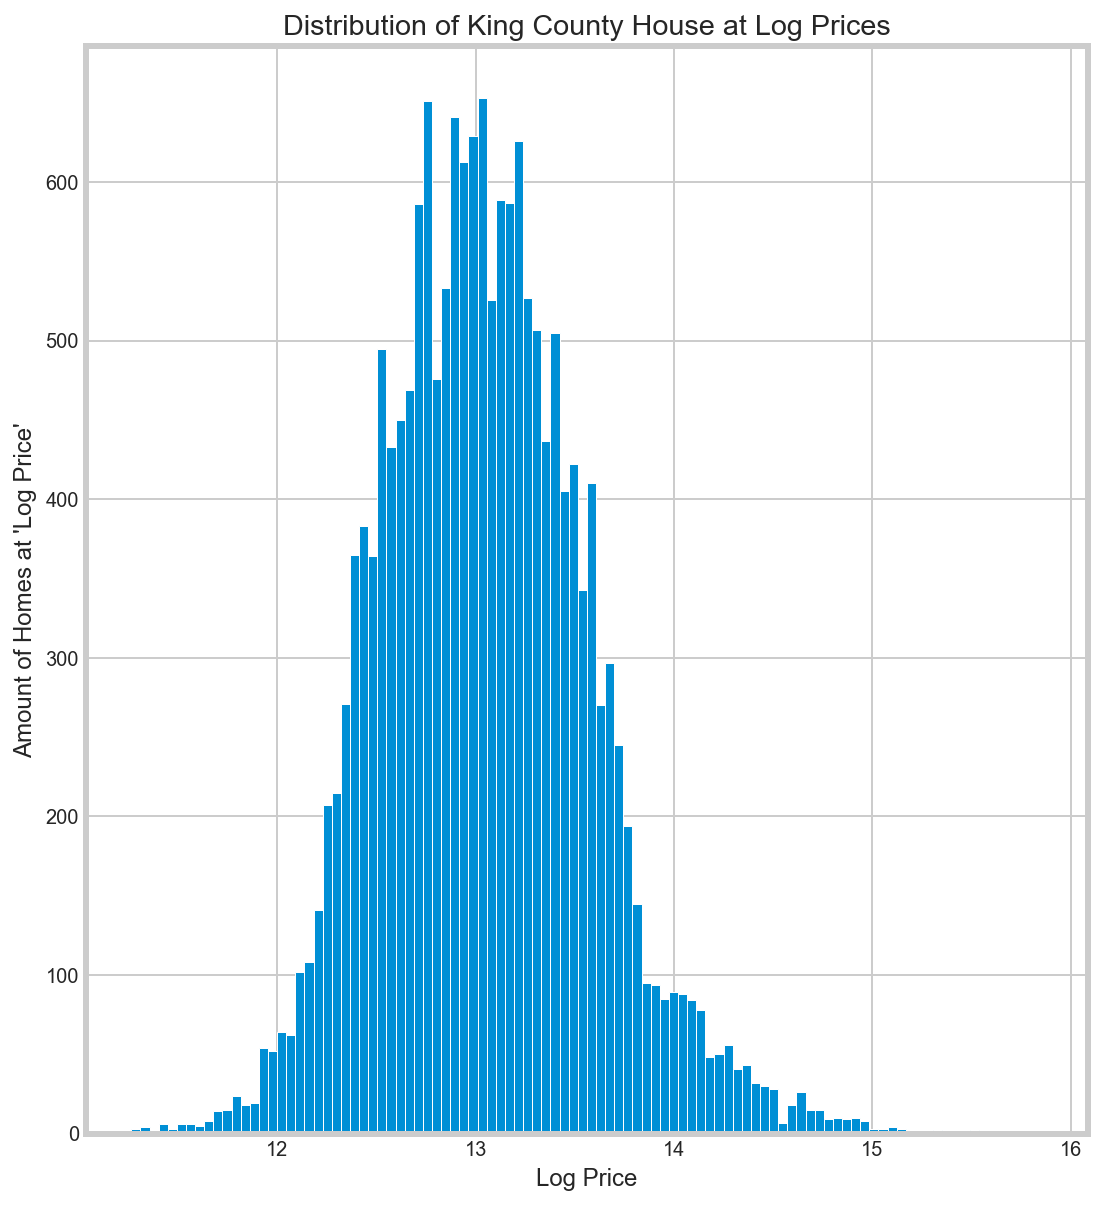

In [14]:
fig, ax = plt.subplots(figsize=(8, 10))

ax.hist(y_train, bins=100)

ax.set_xlabel("Log Price")
ax.set_ylabel("Amount of Homes at 'Log Price'")
ax.set_title("Distribution of King County House at Log Prices");

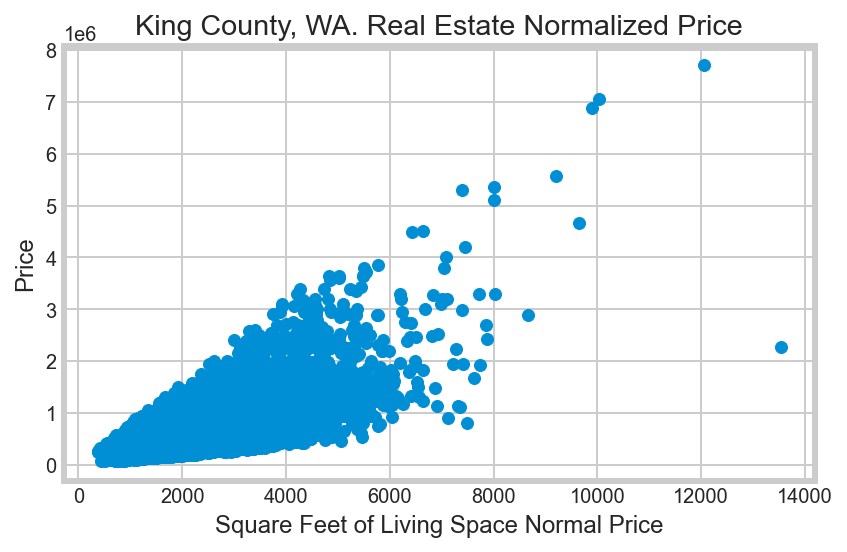

In [15]:
plt.scatter(df['sqft_living'], data['price'])
plt.title('King County, WA. Real Estate Normalized Price')
plt.xlabel('Square Feet of Living Space Normal Price')
plt.ylabel('Price');

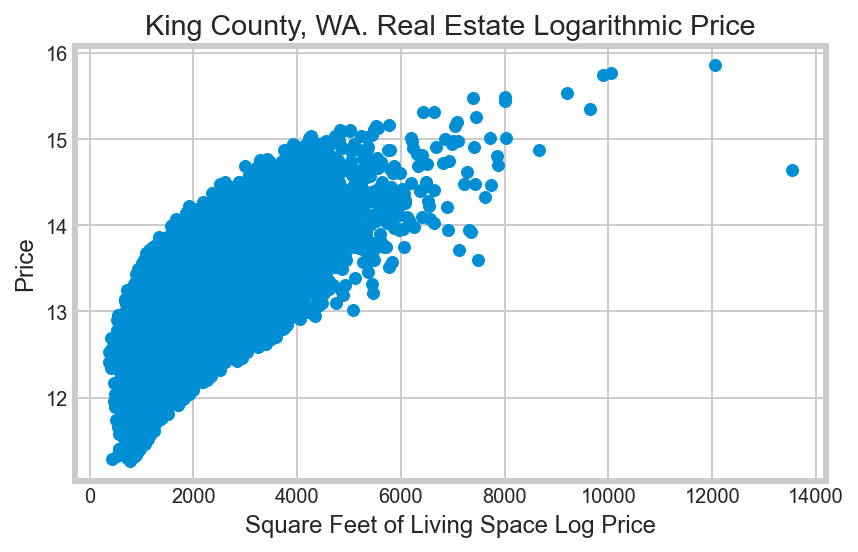

In [16]:
plt.scatter(df['sqft_living'], df['log_price']) # changed log_price to price Sunday night 8:40
plt.title('King County, WA. Real Estate Logarithmic Price')
plt.xlabel('Square Feet of Living Space Log Price')
plt.ylabel('Price');

In [17]:
most_correlated_feature = 'sqft_living'

In [18]:
baseline_model = LinearRegression()

## Model number one

In [19]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48755248820505465
Validation score: 0.47474480711835204


##  Let's have a look at only numeric columns shall we?

In [20]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

X_train_numeric.isnull().sum()

id                 0
date               0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    365
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
month_of_date      0
cen_x              0
cen_y              0
dtype: int64

In [21]:
failed_convert = []
for column in X_train_numeric:
    try:
        df[column] = df[column].astype('int64')
    except:
        failed_convert.append(column)
failed_convert

['sqft_basement']

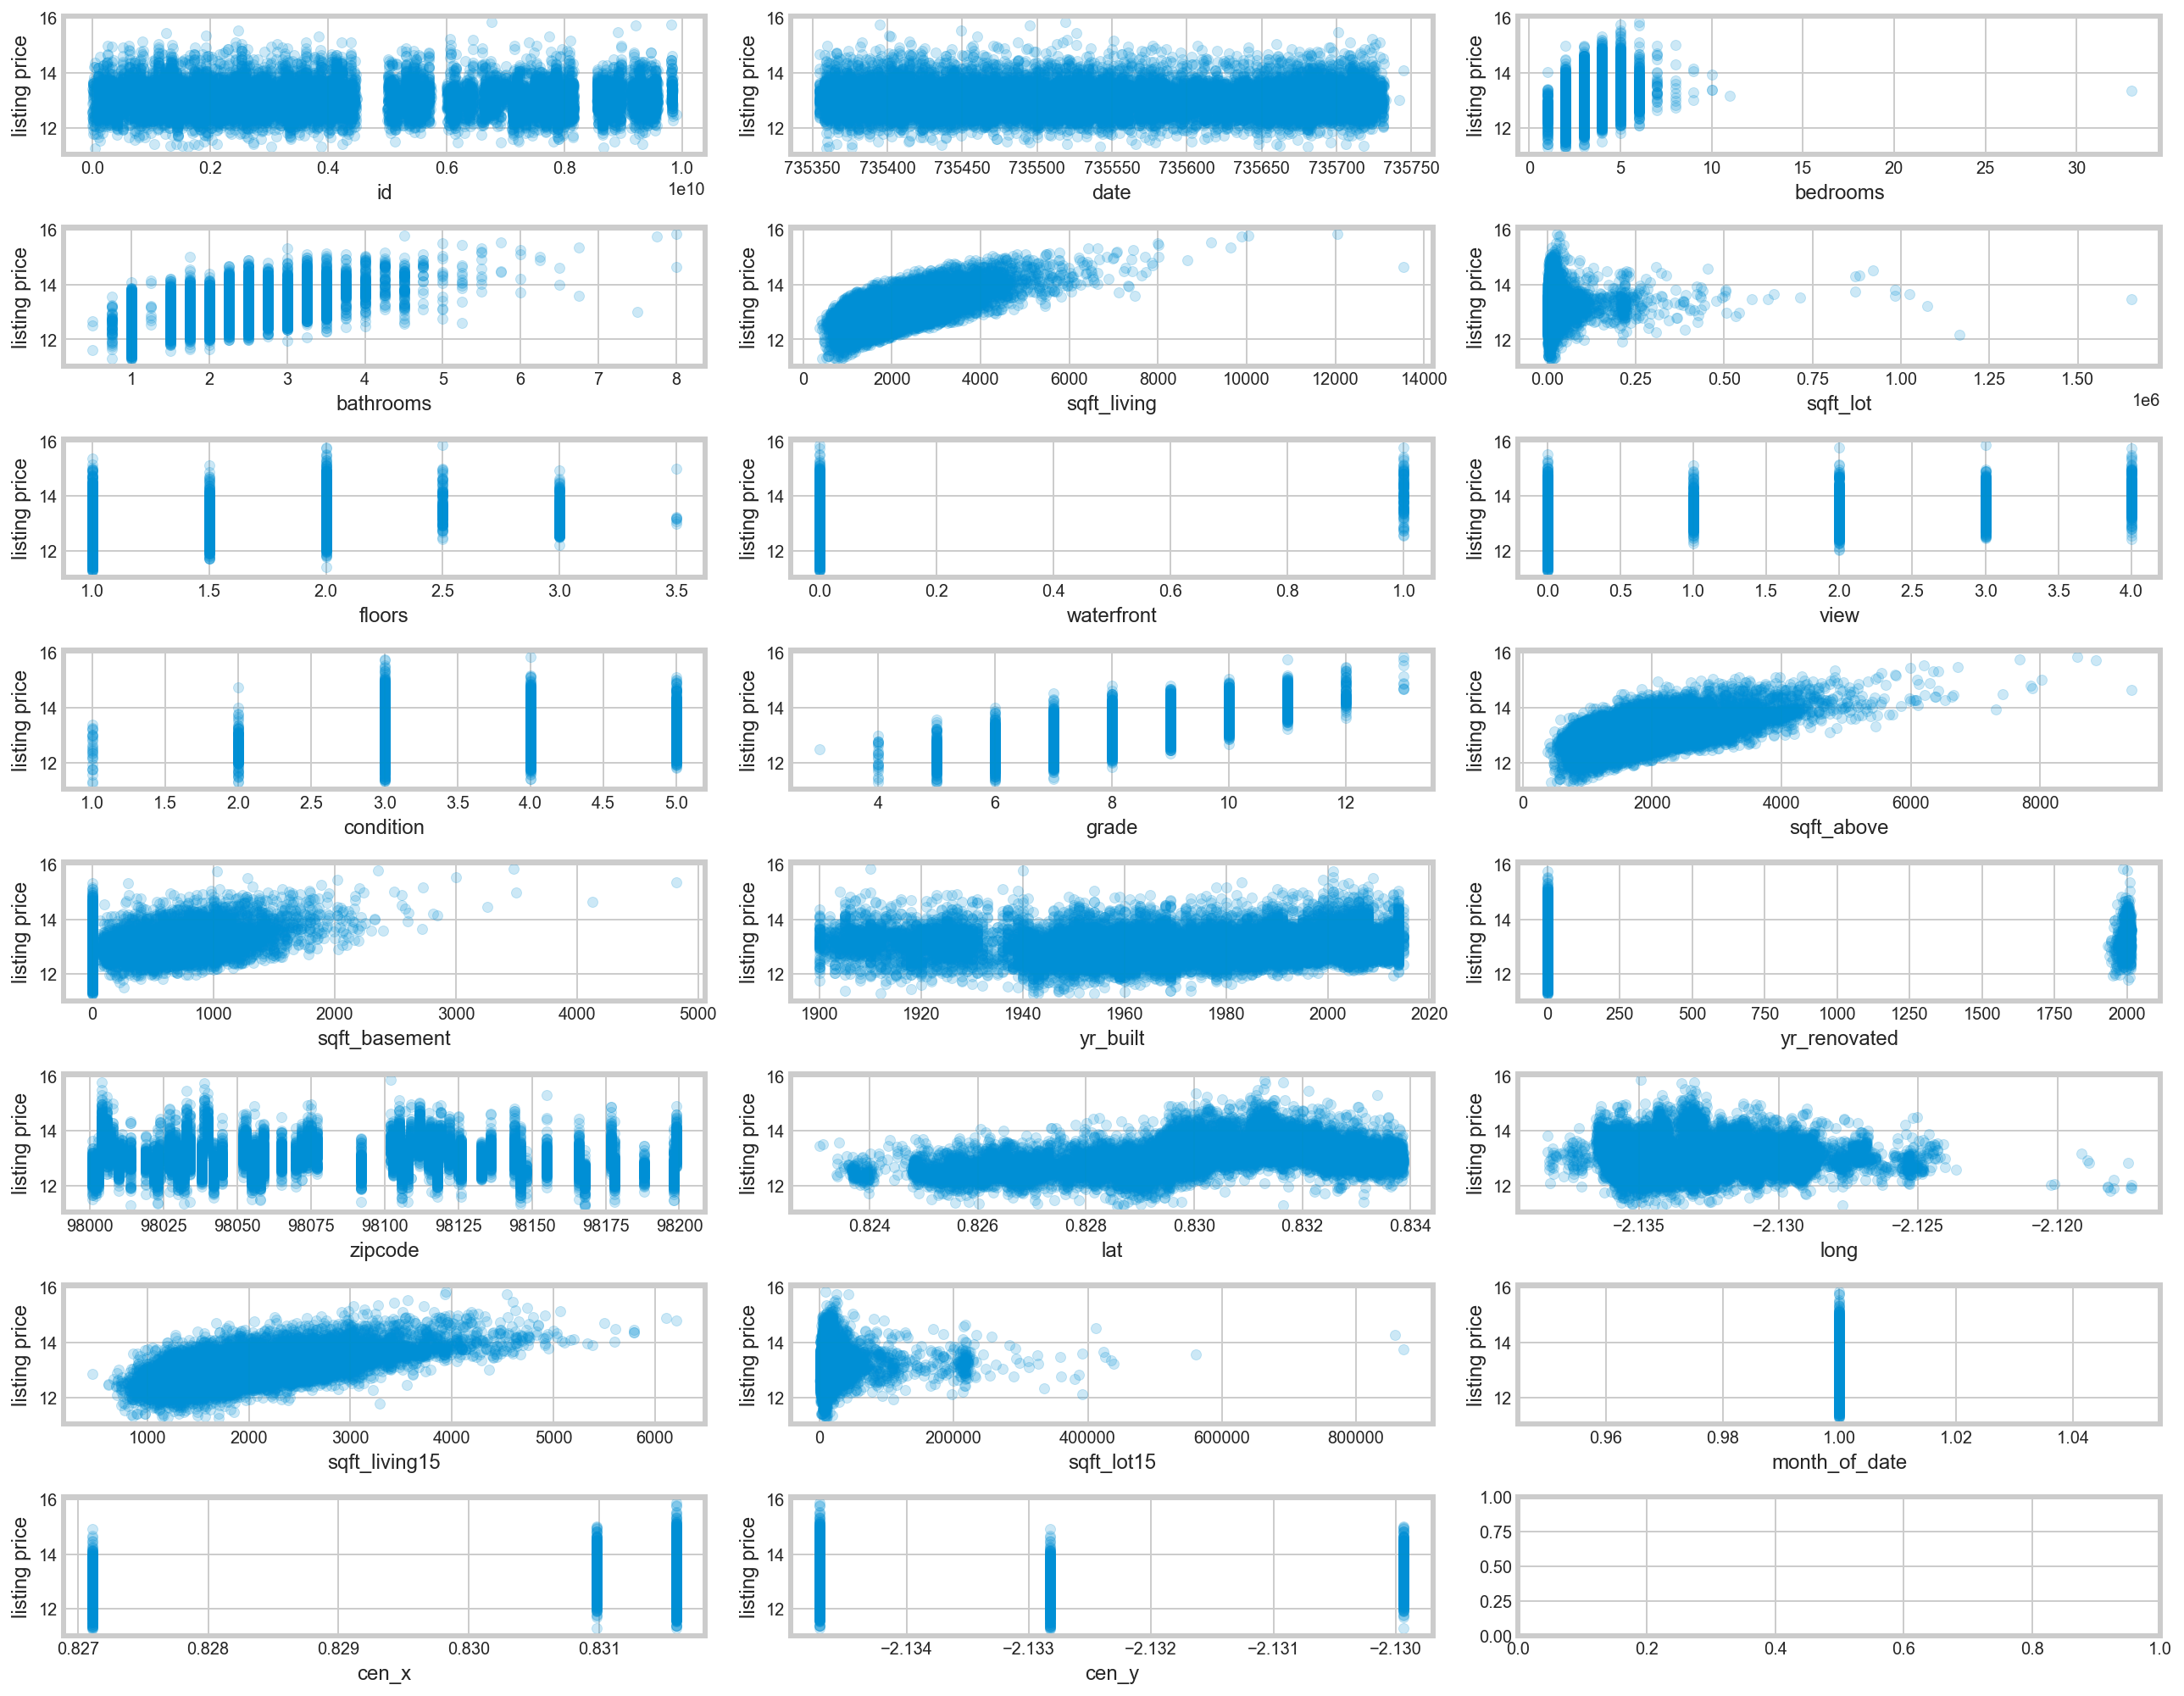

In [22]:
fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(18, 14))
fig.set_tight_layout(True)

for index, col in enumerate(X_train_numeric.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

In [23]:
X_train_second_model = X_train_numeric.drop(columns = [ 'id','sqft_lot', 'floors'
                                                       ,'waterfront', 'yr_built','sqft_basement', 'date'
                                                       ,'zipcode', 'yr_renovated', 'bathrooms', 'cen_x', 'cen_y'])
X_train_second_model.head()

# ****view has something in it that the model doesn't like****

# bedrooms
# sqft_living
# grade
# lat
# sqft_living15
#'sqft_above'
# condition



,bedrooms,sqft_living,view,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,month_of_date
4386,1,820,0.0,3,5,820,0.829583,-2.125183,1590,14163,1
20529,2,1190,0.0,3,8,800,0.831955,-2.135724,1670,2425,1
1212,4,2760,0.0,4,8,1800,0.833367,-2.134381,2490,13158,1
4729,4,3580,0.0,3,10,3580,0.833529,-2.131640,3540,36750,1
6180,4,3030,0.0,3,10,3030,0.830393,-2.130279,2850,8678,1


## Second model

In [24]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.7460211718203138
Validation score: 0.7404722409902301

Baseline Model
Train score:      0.48755248820505465
Validation score: 0.47474480711835204


Given the fact that the Train Scores and Validation Scores are relatively near to eachother, it may be said that there is very little multicollinearity in the second_model

## Tests from Sunday morning (after data loss debacle and recovery), July 11th

## Tests from Saturday night, July 10th

## Test with Lat and Long excluded

In [25]:
# from sklearn.linear_model import LinearRegression
# linreg = LinearRegression()
# linreg.fit(X_train_second_model, y_train)

# y_hat_train = linreg.predict(X_train)
# y_hat_test = linreg.predict(X_test)

## OLS and the search for multicollinearity

In [26]:
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     5037.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:22:02   Log-Likelihood:                -1593.1
No. Observations:               17277   AIC:                             3208.
Df Residuals:                   17266   BIC:                             3293.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0069      0.003     -2.531      0.011      -0.012      -0.002
sqft_living       0.0002   5.69e-06     31.715      0.000       0.000       0.000
view              0.0866      0.003     29.753      0.000       0.081       0.092
condition         0.0927      0.003     28.936      0.000       0.086       0.099
grade             0.1451      0.003     49.042      0.000       0.139       0.151
sqft_above     1.185e-05   5.74e-06      2.065      0.039    6.04e-07    2.31e-05
lat              82.8127      0.860     96.251      0.000      81.126      84.499
long            -13.9006      0.945    -14.712      0.000     -15.753     -12.049
sqft_living15  8.937e-05   4.98e-06     17.938      0.000    7.96e-05    9.91e-05
sqft_lot15     2.336e-07   7.71e-08      3.028      0.002    8.24e-08    3.85e-07
month_of_date   -87.3465      2.055    -42.495      0.000     -91.375     -83.318
==============================================================================
Omnibus:                      233.896   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.967
Skew:                           0.092   Prob(JB):                     8.53e-88
Kurtosis:                       3.723   Cond. No.                     3.38e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
sqft_living: True
view: True
condition: True
grade: True
sqft_above: True
lat: True
long: True
sqft_living15: True
sqft_lot15: True
month_of_date: False


# Third Model

#### chekcing for correlation between Features

In [28]:
# print(df[["bedrooms","sqft_living"]].corr()) # .57
# print(df[["bedrooms","condition"]].corr())# .02
# print(df[["bedrooms","grade"]].corr())# .35
# print(df[["bedrooms","lat"]].corr())# .009
# print(df[["bedrooms","sqft_living15"]].corr()) # .39
# print(df[["bedrooms","view"]].corr())# .07 
# print(df[["bedrooms","sqft_above"]].corr())# .47

# print(df[["sqft_living","condition"]].corr()) # .05
# print(df[["sqft_living","grade"]].corr()) # .76 ***********high
# print(df[["sqft_living","lat"]].corr()) # .05
# print(df[["sqft_living","sqft_living15"]].corr()) # .75 ********high
# print(df[["sqft_living","view"]].corr()) # .28 
# print(df[["sqft_living","sqft_above"]].corr()) # .87 ********high

# print(df[["condition","grade"]].corr()) # -.14
# print(df[["condition","lat"]].corr()) # -.015
# print(df[["condition","sqft_living15"]].corr()) # -.09
# print(df[["condition","view"]].corr()) # .04 
# print(df[["condition","sqft_above"]].corr()) # - .10

# print(df[["grade","lat"]].corr()) # .11
# print(df[["grade","sqft_living15"]].corr()) # .71 *****high
# print(df[["grade","view"]].corr()) # .24 
# print(df[["grade","sqft_above"]].corr()) # .75 ********high

# print(df[["lat","sqft_living15"]].corr()) # .04
# print(df[["lat","view"]].corr()) # .006 
# print(df[["lat","sqft_above"]].corr()) # -.001

# print(df[["sqft_living15","view"]].corr()) # .27 
# print(df[["sqft_living15","sqft_above"]].corr()) # .73********high

# sqft_living and waterfront are lower than sqft_living an view

## Selecting best features

In [29]:
best_features = ['sqft_living', 'view', 'lat'] # minus condition
#bedrooms
# sqft_living
# grade
# lat
# sqft_living15
#'sqft_above'
# condition


In [30]:
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

###  R - Squared 

In [31]:
final_model = LinearRegression()

# fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_train
final_model.score(X_test_final, y_test)

0.6798657410510417

### Mean Squared Error (MSE)

In [32]:
mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

0.30088681826663105

In [33]:
# Run this cell without changes
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living     0.000358
view            0.114274
lat            89.674320
Name: Coefficients, dtype: float64

Intercept: -62.160932609024286


### Investigating Linearity

In [34]:
y_test.min()

11.326595886778735

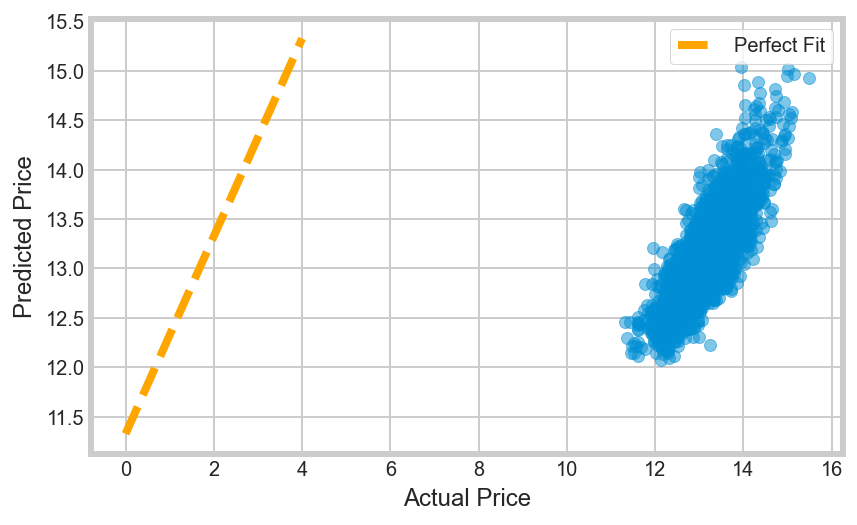

In [35]:
preds = final_model.predict(X_test_final) # commented out this line along with below change 
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line,linestyle="--", color="orange", label="Perfect Fit") # perfect_line, ***removed this from round bracket first position
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

## QQ plot (Quantile-Quantile)

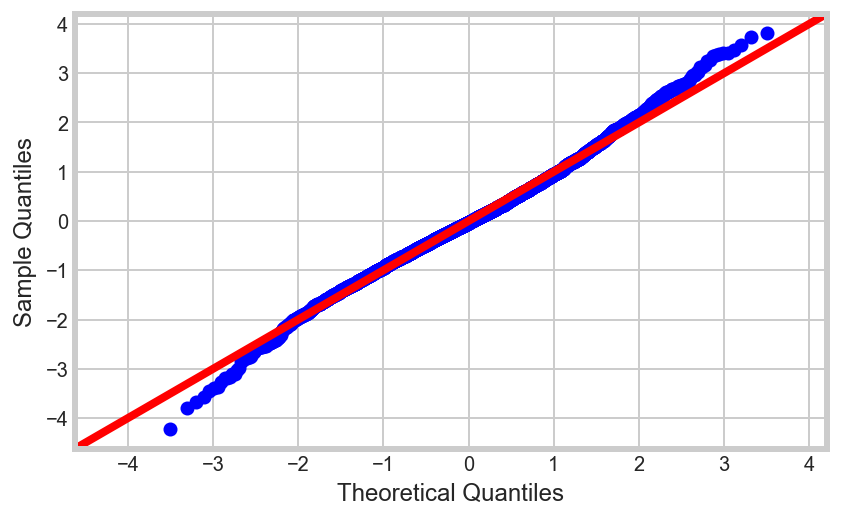

In [36]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Variance Inflation Factor (Above 5 is bad for your health)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_living    6.626493
view           1.185357
lat            6.222227
Name: Variance Inflation Factor, dtype: float64

###  Homeoscedasticity Check

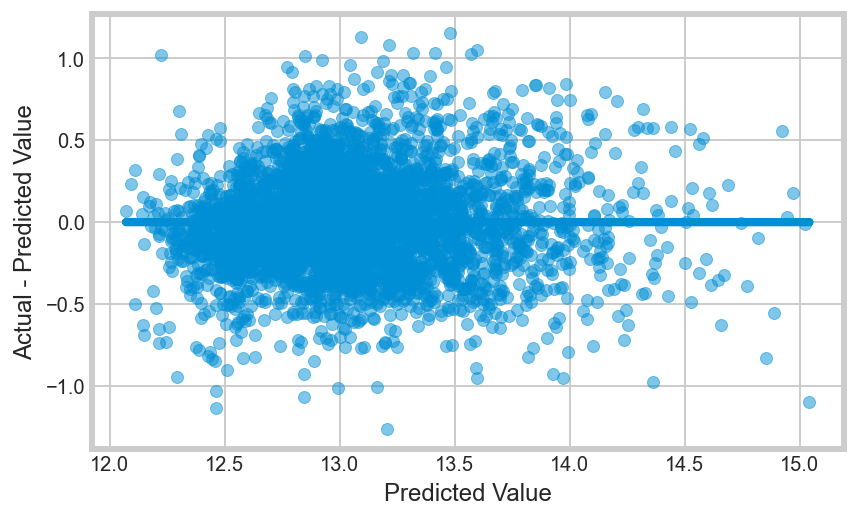

In [38]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");